In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
#import os
#os.chdir('/content/drive/My Drive/Colab Notebooks/Datasets/PneumoniaDataset')

base_path = '/content/drive/My Drive/Colab Notebooks/Datasets/PneumoniaDataset'
train_path = base_path + '/train'
test_path = base_path + '/test'
val_path = base_path + '/val'





#DISPLAY SAMPLE IMAGES

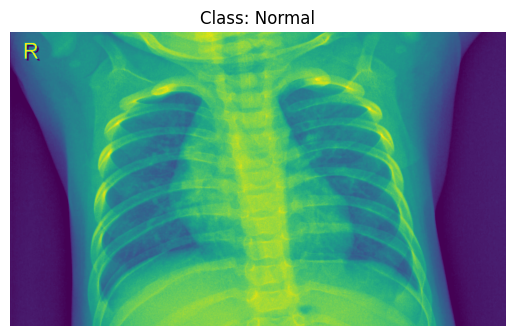

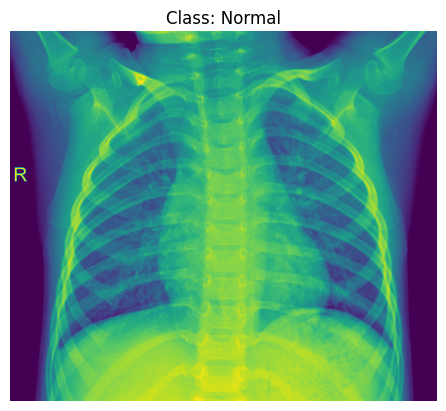

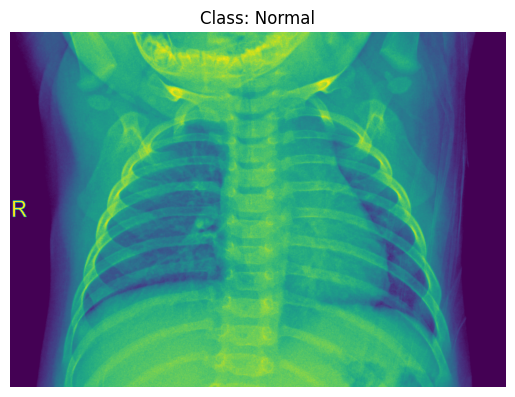

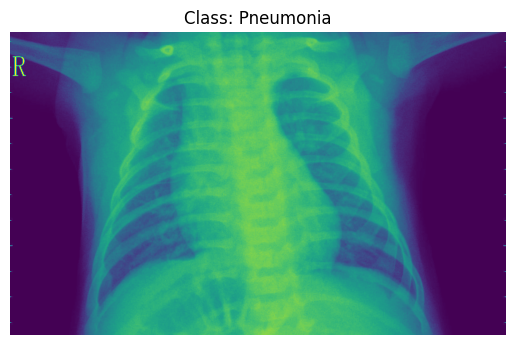

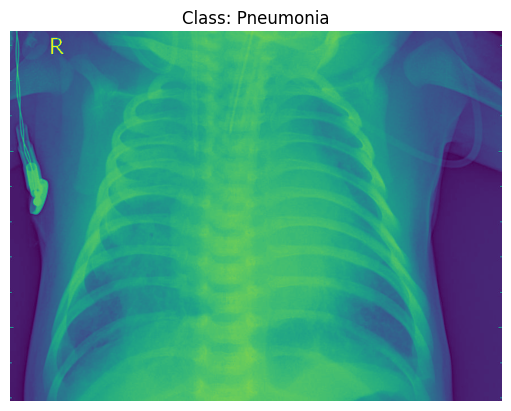

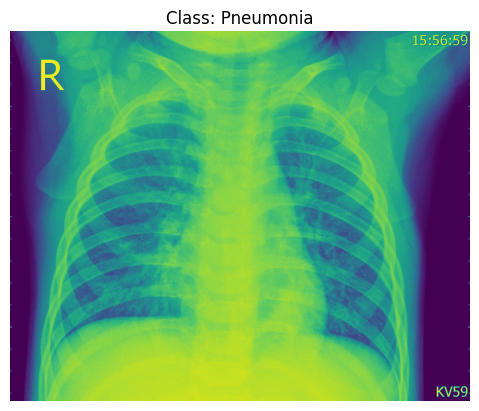

In [15]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to display sample images from a folder with labels
def display_sample_images_with_labels(folder_path, class_label, num_images=3):
    # Get a list of image files in the folder
    image_files = random.sample(os.listdir(folder_path), num_images)

    # Display the sample images with labels
    for img_file in image_files:
        img_path = os.path.join(folder_path, img_file)
        img = mpimg.imread(img_path)

        # Display the image with the class label as the title
        plt.imshow(img)
        plt.title(f"Class: {class_label}")
        plt.axis('off')  # Hide axis labels and ticks
        plt.show()

# Display sample images from the training set with labels
display_sample_images_with_labels(train_path + '/NORMAL', class_label='Normal')
display_sample_images_with_labels(train_path + '/PNEUMONIA', class_label='Pneumonia')


#Basic Statistics About Dataset(Before Augmentation)

In [16]:

# Function to display basic statistics about a dataset, excluding non-directory files
def dataset_statistics(dataset_path):
    classes = [class_name for class_name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, class_name))]

    for class_name in classes:
        class_path = os.path.join(dataset_path, class_name)
        num_images = len(os.listdir(class_path))
        print(f"Class: {class_name}, Number of Images: {num_images}")

# Display basic statistics about the training set
dataset_statistics(train_path)




Class: NORMAL, Number of Images: 1349
Class: PNEUMONIA, Number of Images: 3895


#Randomizing to Prevent Overfitting

In [17]:
import os
import random
import shutil

def swap_random_files(folder1, folder2):
    if not os.path.isdir(folder1) or not os.path.isdir(folder2):
        print("One or both directories do not exist.")
        return

    # Create a list of subfolders
    subfolders = [f.path for f in os.scandir(folder1) if f.is_dir()]
    total= 0
    for subfolder in subfolders:
        subfolder_name = os.path.basename(subfolder)
        subfolder1_files = [os.path.join(folder1, subfolder_name, f) for f in os.listdir(os.path.join(folder1, subfolder_name)) if os.path.isfile(os.path.join(folder1, subfolder_name, f))]
        subfolder2_files = [os.path.join(folder2, subfolder_name, f) for f in os.listdir(os.path.join(folder2, subfolder_name)) if os.path.isfile(os.path.join(folder2, subfolder_name, f))]

        # Calculate random number of files to swap based on the smaller folder
        num_files_to_swap = random.randint(1, min(len(subfolder1_files), len(subfolder2_files)))
        print(f'number of swap= {num_files_to_swap}')
        total+= num_files_to_swap


        # Select random files to swap
        selected_files_from_folder1 = random.sample(subfolder1_files, num_files_to_swap)
        selected_files_from_folder2 = random.sample(subfolder2_files, num_files_to_swap)

        # Swap the files
        for file1, file2 in zip(selected_files_from_folder1, selected_files_from_folder2):
            temp_path = file1 + ".tmp"
            shutil.move(file1, temp_path)  # Temporarily move file1 out of the way
            shutil.move(file2, file1)      # Move file2 to file1's original location
            shutil.move(temp_path, file2)  # Move the original file1 to file2's original location

            print(f"Swapped {os.path.basename(file1)} and {os.path.basename(file2)}")
    print(f'total number of swap= {total}')

# Example usage
folder1 = train_path
folder2 = test_path
swap_random_files(folder1, folder2)

number of swap= 53
Swapped NORMAL2-IM-0413-0001.jpeg and NORMAL2-IM-0272-0001.jpeg
Swapped NORMAL2-IM-1179-0001.jpeg and NORMAL2-IM-0347-0001.jpeg
Swapped IM-0424-0001.jpeg and IM-0067-0001.jpeg
Swapped IM-0548-0001.jpeg and NORMAL2-IM-0111-0001.jpeg
Swapped IM-0249-0001.jpeg and NORMAL2-IM-0213-0001.jpeg
Swapped NORMAL2-IM-1145-0001.jpeg and NORMAL2-IM-0132-0001.jpeg
Swapped NORMAL2-IM-0775-0001.jpeg and NORMAL2-IM-0221-0001.jpeg
Swapped IM-0185-0001.jpeg and NORMAL2-IM-0281-0001.jpeg
Swapped NORMAL2-IM-0952-0001.jpeg and IM-0087-0001.jpeg
Swapped IM-0659-0001.jpeg and NORMAL2-IM-0129-0001.jpeg
Swapped NORMAL2-IM-1182-0001.jpeg and NORMAL2-IM-0357-0001.jpeg
Swapped IM-0431-0001.jpeg and IM-0110-0001.jpeg
Swapped NORMAL2-IM-1320-0001.jpeg and NORMAL2-IM-0331-0001.jpeg
Swapped NORMAL2-IM-1025-0001.jpeg and NORMAL2-IM-0374-0001-0002.jpeg
Swapped IM-0312-0001.jpeg and NORMAL2-IM-0007-0001.jpeg
Swapped IM-0421-0001.jpeg and IM-0107-0001.jpeg
Swapped IM-0427-0001.jpeg and NORMAL2-IM-0359-00

In [18]:

IMAGE_SIZE = [224, 224]

BATCH_SIZE = 32


#Train Data Generation

In [19]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,  # Example: Rotate images randomly up to 20 degrees
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)


train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)



Found 5244 images belonging to 2 classes.


#Test Data Genaration


In [20]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 625 images belonging to 2 classes.


#Validation Data Generation

In [21]:
val_generator = train_datagen.flow_from_directory(
    val_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 16 images belonging to 2 classes.


#Model Generation

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping






model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=train_generator.image_shape, padding='same'))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))

model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

early_stop = EarlyStopping(patience=10, monitor='val_loss')
adam = Adam(learning_rate=0.0001)

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 256)     7168      
                                                                 
 activation (Activation)     (None, 224, 224, 256)     0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 112, 112, 256)     0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 112, 112, 256)     448       
 Normalization)                                                  
                                                                 
 conv2d_14 (Conv2D)          (None, 112, 112, 64)      147520    
                                                                 
 activation_1 (Activation)   (None, 112, 112, 64)     

#Model Compilation

In [23]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=30, validation_data=val_generator)


test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

Epoch 1/30
164/164 [==============================] - 192s 877ms/step - loss: 0.7054 - accuracy: 0.7317 - val_loss: 1.1399 - val_accuracy: 0.5000
Epoch 2/30
164/164 [==============================] - 143s 867ms/step - loss: 0.5434 - accuracy: 0.7405 - val_loss: 1.0687 - val_accuracy: 0.5000
Epoch 3/30
164/164 [==============================] - 142s 867ms/step - loss: 0.5145 - accuracy: 0.7424 - val_loss: 0.8239 - val_accuracy: 0.5000
Epoch 4/30
164/164 [==============================] - 142s 863ms/step - loss: 0.5012 - accuracy: 0.7424 - val_loss: 0.7484 - val_accuracy: 0.5000
Epoch 5/30
164/164 [==============================] - 140s 855ms/step - loss: 0.5199 - accuracy: 0.7433 - val_loss: 0.7108 - val_accuracy: 0.5000
Epoch 6/30
164/164 [==============================] - 141s 857ms/step - loss: 0.4984 - accuracy: 0.7428 - val_loss: 0.8383 - val_accuracy: 0.5000
Epoch 7/30
164/164 [==============================] - 143s 869ms/step - loss: 0.4745 - accuracy: 0.7428 - val_loss: 0.6670 -

In [1]:
# First, check the keys in the history object
print(model.history.history.keys())

# Then, adjust the plotting code according to the available keys
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(model.history.history['acc'])  # Replace 'accuracy' with 'acc' if that's the correct key
plt.plot(model.history.history['val_acc'])  # Similarly, replace 'val_accuracy' with 'val_acc'
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# ... rest of your code ...


NameError: name 'model' is not defined

Model Summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 256)     7168      
                                                                 
 activation (Activation)     (None, 224, 224, 256)     0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 112, 112, 256)     0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 112, 112, 256)     448       
 Normalization)                                                  
                                                                 
 conv2d_14 (Conv2D)          (None, 112, 112, 64)      147520    
                                                                 
 activation_1 (Activation)   (None, 112

KeyError: 'accuracy'

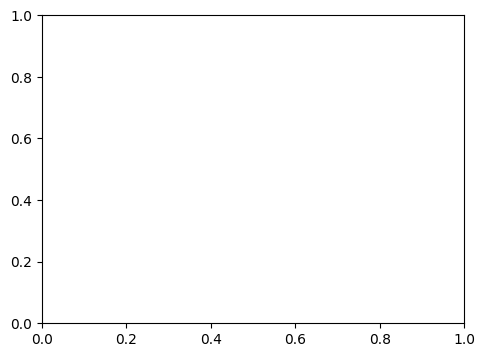

In [24]:
# Import necessary libraries
from keras.models import load_model

#  Model Summary
print("Model Summary:")
print(model.summary())

#  Training Process Overview
# Assuming you have history object from model.fit
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

#  Evaluation on Test Data
test_loss, test_acc = model.evaluate(test_generator)
print(f'\nTest Accuracy: {test_acc:.2f}')
print(f'Test Loss: {test_loss:.2f}')

# Saving the Model
model.save('base_path/model.h5')
print("Model saved successfully.")


In [ ]:
import time

while True:
    print(time.ctime())
    time.sleep(300)  # Sleep for 300 seconds (5 minutes)
